<a href="https://colab.research.google.com/github/IreneYU2001/Yixi-YU-EXPLORING-SUPERMARKET-SALES-PATTERNS-IN-ECUADOR/blob/main/Yixi_Yu_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Experimentation and Causal Methods
## Assignment 1
Yixi Yu

This assignment contains two parts. In the first part, your task is to analyze a dataset from a real-world experiment testing different headlines on social media. In the second part, your task will be to answer several questions about an application of the potential outcomes framework.

**Before you begin, please make sure to take a look at the notes on Python. Remember to use Slack to ask any questions you may have.**

## Part 1: Analyzing a real-world experiment

The data for this exercise comes from an experiment conducted by the Upworthy, a company famous for pioneering the use of experiments to find `clickbait' headlines that generate the most user engagement. The dataset contains rows corresponding to impressions (which occur when a user sees the link headline on social media). It also contains data on whether the impression leads to a click.

**Variable definitions**

headline: The headline shown to the user (string)

slug: The url corresponding to the headline (string)

clicked: Whether the user clicked on the headline, 1 or 0 (boolean)

eyecatcher_id: The id of the image shown with the headline (integer)

### Question 1:

Please change your name in the header from "Your Name Here" to your name. This helps when reading a submission.

### Question 2:

Please run the cell below to load the data. Verify that all of the columns are there by return the first 5 rows of `data_upworthy`.

In [ ]:
from google.colab import data_table
from google.colab import drive
# Enable the interactive table feature
data_table.enable_dataframe_formatter()
# Access Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Copy the dataset located at 'data/data_upworthy_exp.csv' into your own Google Drive.
# Paste the folder where you've put the data into this read_csv function.
data_upworthy = pd.read_csv('/content/drive/My Drive/BA830 - Winter 2025/data/data_upworthy_exp.csv')

# Create a new column called 'slug_legally' that takes the value of 1 if the slug contains the word legally, and 0 otherwise.
data_upworthy['slug_legally'] = data_upworthy['slug'].str.contains('legally').astype(int)

# Generate a random variable. It is meaningless, but it will allow us to see how the data is structured.
# This variable takes random values from a normal distribution with mean 0 and standard deviation 5. It is then rounded.
# The length of the variable is the same as the length of the data.
data_upworthy['random_variable'] =  np.round(np.random.normal(0, 5, len(data_upworthy)))

# Look at the data:
data_upworthy

headline  \
0      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
1      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
2      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
3      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
4      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
...                                                  ...   
18212  I'll Say It: It's Not OK For States To Legally...   
18213  I'll Say It: It's Not OK For States To Legally...   
18214  I'll Say It: It's Not OK For States To Legally...   
18215  I'll Say It: It's Not OK For States To Legally...   
18216  I'll Say It: It's Not OK For States To Legally...   

                                                    slug  \
0      let-s-see-hire-cops-pay-teachers-buy-books-for...   
1      let-s-see-hire-cops-pay-teachers-buy-books-for...   
2      let-s-see-hire-cops-pay-teachers-buy-books-for...   
3      let-s-see-hire-cops-pay-teachers-buy-books-for...   
4      let-s-see-hire-cops-pay-teachers-buy-books-for...   
...                                                  ...   
18212  ill-say-it-its-not-ok-for-states-to-legally-mu...   
18213  ill-say-it-its-not-ok-for-states-to-legally-mu...   
18214  ill-say-it-its-not-ok-for-states-to-legally-mu...   
18215  ill-say-it-its-not-ok-for-states-to-legally-mu...   
18216  ill-say-it-its-not-ok-for-states-to-legally-mu...   

                  eyecatcher_id clicked  slug_legally  random_variable  
0      546dce659ad54ec65b000041       1             0             -4.0  
1      546dce659ad54ec65b000041       1             0             10.0  
2      546dce659ad54ec65b000041       1             0              5.0  
3      546dce659ad54ec65b000041       1             0             -3.0  
4      546dce659ad54ec65b000041       1             0              4.0  
...                         ...     ...           ...              ...  
18212  546dce659ad54ec65b000041       0             1              5.0  
18213  546dce659ad54ec65b000041       0             1             -2.0  
18214  546dce659ad54ec65b000041       0             1             14.0  
18215  546dce659ad54ec65b000041       0             1              0.0  
18216  546dce659ad54ec65b000041       0             1             -1.0  

[18217 rows x 6 columns]

### Question 3:
Find the headline corresponding to row 4203 and create a variable called `this_headline` with the headline. Return the object `this_headline’. By ‘return’ I mean just type ‘this_headline’ into the cell and when it runs it will show you the contents of ‘this_headline’.


In [ ]:
# Remember, you can reference rows and columns in a Python dataframe using the .loc method. For example, data.loc[5, 'column_name'] would return the value of 'column_name' for the 6th row of the dataframe.

# Your code here.

this_headline = data_upworthy.loc[4203, 'headline']
this_headline

'$3 Million Is What It Takes For A State To Legally Kill Someone'

### Question 4:
Select a subset of the data for which column `clicked` equals 1. This represents the observations where the user clicked on the headline.

In [ ]:
# Your code here.
data_upworthy[data_upworthy['clicked'] == '1']

headline  \
0      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
1      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
2      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
3      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
4      Let’s See … Hire Cops, Pay Teachers, Buy Books...   
...                                                  ...   
15235  I'll Say It: It's Not OK For States To Legally...   
15236  I'll Say It: It's Not OK For States To Legally...   
15237  I'll Say It: It's Not OK For States To Legally...   
15238  I'll Say It: It's Not OK For States To Legally...   
15239  I'll Say It: It's Not OK For States To Legally...   

                                                    slug  \
0      let-s-see-hire-cops-pay-teachers-buy-books-for...   
1      let-s-see-hire-cops-pay-teachers-buy-books-for...   
2      let-s-see-hire-cops-pay-teachers-buy-books-for...   
3      let-s-see-hire-cops-pay-teachers-buy-books-for...   
4      let-s-see-hire-cops-pay-teachers-buy-books-for...   
...                                                  ...   
15235  ill-say-it-its-not-ok-for-states-to-legally-mu...   
15236  ill-say-it-its-not-ok-for-states-to-legally-mu...   
15237  ill-say-it-its-not-ok-for-states-to-legally-mu...   
15238  ill-say-it-its-not-ok-for-states-to-legally-mu...   
15239  ill-say-it-its-not-ok-for-states-to-legally-mu...   

                  eyecatcher_id clicked  slug_legally  random_variable  
0      546dce659ad54ec65b000041       1             0              9.0  
1      546dce659ad54ec65b000041       1             0              5.0  
2      546dce659ad54ec65b000041       1             0             -5.0  
3      546dce659ad54ec65b000041       1             0              5.0  
4      546dce659ad54ec65b000041       1             0             -3.0  
...                         ...     ...           ...              ...  
15235  546dce659ad54ec65b000041       1             1             -6.0  
15236  546dce659ad54ec65b000041       1             1              6.0  
15237  546dce659ad54ec65b000041       1             1              4.0  
15238  546dce659ad54ec65b000041       1             1              4.0  
15239  546dce659ad54ec65b000041       1             1             -3.0  

[103 rows x 6 columns]

### Question 5:
Are there any missing or inappropriate values in the data? If so use Python to identify these.

In [ ]:
# Check for missing values in the data
missing_values = data_upworthy.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for inappropriate values
# Ensure 'clicked' column has only 0 or 1
if 'clicked' in data_upworthy.columns:
    unique_clicked_values = data_upworthy['clicked'].unique()
    print("\nUnique values in 'clicked' column:", unique_clicked_values)


Missing values in each column:
headline           0
slug               0
eyecatcher_id      0
clicked            2
slug_legally       0
random_variable    0
dtype: int64

Unique values in 'clicked' column: ['1' '0' nan '"']


In [ ]:
data_upworthy[data_upworthy['clicked'].isnull()]

headline  \
40   Let’s See … Hire Cops, Pay Teachers, Buy Books...   
188  Let’s See … Hire Cops, Pay Teachers, Buy Books...   

                                                  slug  \
40   let-s-see-hire-cops-pay-teachers-buy-books-for...   
188  let-s-see-hire-cops-pay-teachers-buy-books-for...   

                eyecatcher_id clicked  slug_legally  random_variable  
40   546dce659ad54ec65b000041     NaN             0              6.0  
188  546dce659ad54ec65b000041     NaN             0              1.0

In [ ]:
data_upworthy[data_upworthy['clicked']== '"']

headline  \
242  Let’s See … Hire Cops, Pay Teachers, Buy Books...   

                                                  slug  \
242  let-s-see-hire-cops-pay-teachers-buy-books-for...   

                eyecatcher_id clicked  slug_legally  random_variable  
242  546dce659ad54ec65b000041       "             0             -2.0

### Question 6:
Use python to calculate the number of unique headlines. You can use the `nunique()` method to do this.

In [ ]:
# Here's an example:
data_upworthy['slug'].nunique()
# Your code here'
data_upworthy['headline'].nunique()

6

### Question 7:
Calculate the share of impressions that see each headline. You can use the `value_counts()` method to do this.

In [ ]:
# To get you started, below is some example code that uses the value counts method. You can use this as a starting point for your own code.
# This calculates the number of times each value of the random variable occurs in the data.
value_random_variables = data_upworthy['random_variable'].value_counts()
value_random_variables

# This shows the total number of rows in the data.
len(data_upworthy)

# Your code here
for i in data_upworthy['headline'].unique():
  print('headline:',i, 'share:',len(data_upworthy[data_upworthy['headline']==i])/len(data_upworthy))


headline: Let’s See … Hire Cops, Pay Teachers, Buy Books For Schools. Or Kill People. Hard Choice, Right? share: 0.17115880770708677
headline: $3 Million Is What It Takes For A State To Legally Kill Someone share: 0.16561453587308558
headline: The Fact That Sometimes Innocent People Are Executed Is Enough To End The Death Penalty. But This? share: 0.16325410331009496
headline: Reason #351 To End The Death Penalty: It Costs $3 Million Per Case. share: 0.16742603063072953
headline: I Was Already Against The Death Penalty, But Now That I See What It Costs Us All? Ahem. share: 0.16802986221661087
headline: I'll Say It: It's Not OK For States To Legally Murder People. share: 0.16451666026239228


### Question 8:
Calculate the click rate by headline. Which one has the highest?

In [ ]:
non_numeric_values = data_upworthy[~data_upworthy['clicked'].apply(lambda x: isinstance(x, (int, float)))]
data_upworthy['clicked'] = pd.to_numeric(data_upworthy['clicked'], errors='coerce')
data_upworthy['clicked'].fillna(0, inplace=True)

print(non_numeric_values)
# Sample code. This code calculate the mean of clicked by each value of 'slug_legally'
data_click_slug = data_upworthy.groupby('slug_legally').agg(click_rate=('clicked', 'mean'), num_impressions=('clicked', 'size')).reset_index()
data_click_slug
# Your code here:
click_rate=data_upworthy.groupby('headline').agg(click_rate=('clicked', 'mean'), num_impressions=('clicked', 'size')).reset_index()
print(click_rate)
print('The headline with the highest click rate is:', data_upworthy.loc[data_upworthy['clicked'].idxmax(), 'headline'])

Empty DataFrame
Columns: [headline, slug, eyecatcher_id, clicked, slug_legally, random_variable]
Index: []
                                            headline  click_rate  \
0  $3 Million Is What It Takes For A State To Leg...    0.006298   
1  I Was Already Against The Death Penalty, But N...    0.006534   
2  I'll Say It: It's Not OK For States To Legally...    0.006673   
3  Let’s See … Hire Cops, Pay Teachers, Buy Books...    0.002566   
4  Reason #351 To End The Death Penalty: It Costs...    0.003279   
5  The Fact That Sometimes Innocent People Are Ex...    0.008742   

   num_impressions  
0             3017  
1             3061  
2             2997  
3             3118  
4             3050  
5             2974  
The headline with the highest click rate is: Let’s See … Hire Cops, Pay Teachers, Buy Books For Schools. Or Kill People. Hard Choice, Right?


<ipython-input-19-55ed02c16423>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_upworthy['clicked'].fillna(0, inplace=True)


### Question 9:
Plot the click rate by headline using the either the `seaborn` library.

The `seaborn` documentation is available [here](https://seaborn.pydata.org/).


### Bonus:
Make the plot look really good. The few best plots in each class will get extra points.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


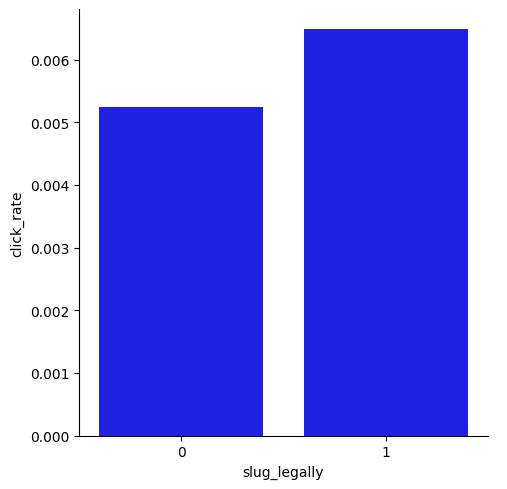

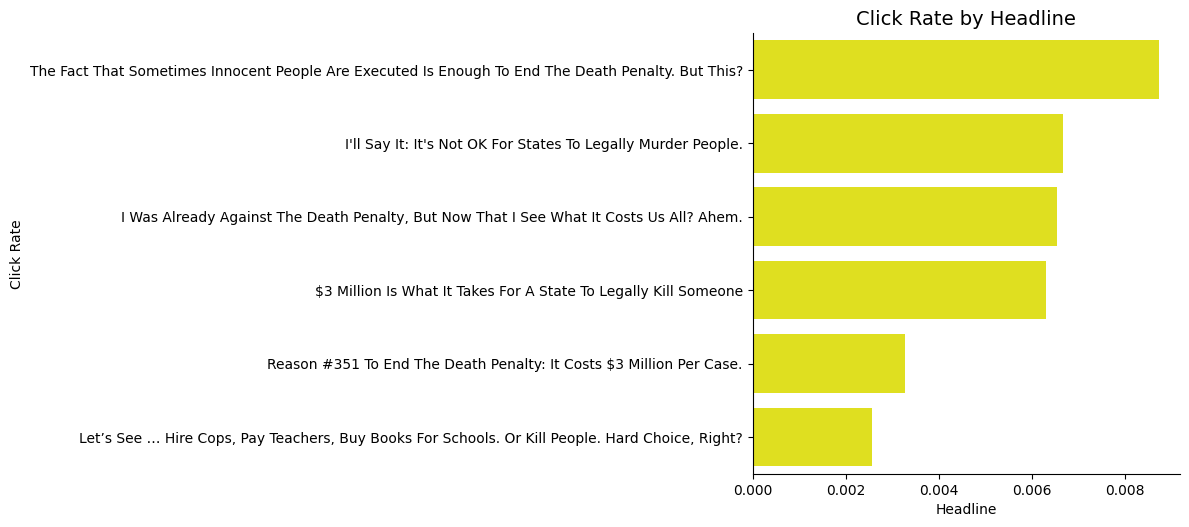

In [ ]:
import matplotlib.ticker as ticker
import seaborn as sn
import matplotlib.pyplot as plt

# Seaborn
g = sn.catplot(data = data_click_slug, kind="bar", x="slug_legally", hue = None, y = "click_rate", color = 'blue')
sorted_headlines = click_rate.sort_values(by="click_rate", ascending=False)['headline']
g = sn.catplot(data = click_rate, kind="bar", x="click_rate", hue = None, y = "headline", color = 'yellow',order=sorted_headlines, legend=False)
g.set_axis_labels("Headline", "Click Rate")
plt.title("Click Rate by Headline", fontsize=14)
plt.show()

## Part 2: Potential Outcomes

Suppose Wayfair is interested in ways to increase the conversion rate of its users. Wayfair’s hypothesis is that by providing a question and answer section on each furniture page, they would be able to induce users to buy more furniture. The problem is inspired by this [paper](https://people.bu.edu/zg/publications/reviews-qa.pdf) but you don’t have to read it.


Consider the following population of ten users whose sales rates we can measure.

| Potential Outcomes (POs) | Revenue if user saw Q&A | Revenue if user did not see Q&A |
|-------------------------|-------------------------|---------------------------------|
| User 1                  | 1100                    | 1100                            |
| User 2                  | 100                     | 600                             |
| User 3                  | 500                     | 500                             |
| User 4                  | 100                     | 900                             |
| User 5                  | 1600                    | 700                             |
| User 6                  | 2000                    | 2000                            |
| User 7                  | 1200                    | 1200                            |
| User 8                  | 700                     | 700                             |
| User 9                  | 1100                    | 300                             |
| User 10                 | 140                     | 140                             |


#### 2.1: What do User 2’s two potential outcomes mean in plain language?

#### 2.2: Give the individual true treatment effect (that is, the true “impact” or “causal effect” of Q&A) for each of the ten users. We are thinking of the “Treatment” as seeing the Q&A.
_Notes_:
- This is only possible because we are working with hypothetical potential outcomes; we could never have this much information with real-world data.
- We encourage the use of computing tools on all problems, but please describe your work so that we can determine whether you are using the correct values (e.g.: include code if using Python). This will become more important in future problem sets._


#### 2.3: In a single paragraph, tell a story that could explain this distribution of treatment effects. What might cause some users to have different treatment effects than others?


#### 2.4: For this population of 10 users, what is the true average treatment effect (ATE) of seeing Q&A?


#### 2.5: Suppose that Wayfair implements an experiment in which users are randomly assigned to Treatment and Control groups. Assume that by chance (that is, suppose this is random) the odd-numbered users are assigned to Treatment (Q&A) and the even-numbered users to Control (no Q&A).  What is the estimate of the ATE you would reach under that particular assignment? (Again, please show your work.)  


#### 2.6: Please use the function ‘np.quantile’ in Python to calculate the 30th quantile of the treatment effects in the Q&A example.
_Note: This question is testing your ability to use the documentation in Python to correctly apply a function._


How long did this assignment take you to do (hours)? How hard was it (easy, reasonable, hard, too hard)?  


In [ ]:
# This code creates the above table:
data = {
    'person': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'rev_if_qa': [1100, 100, 500, 100, 1600, 2000, 1200, 700, 1100, 140],
    'rev_if_noqa': [1100, 600, 500, 900, 700, 2000, 1200, 700, 300, 140]
}

df = pd.DataFrame(data)
print(df)

   person  rev_if_qa  rev_if_noqa
0       1       1100         1100
1       2        100          600
2       3        500          500
3       4        100          900
4       5       1600          700
5       6       2000         2000
6       7       1200         1200
7       8        700          700
8       9       1100          300
9      10        140          140


2.1

User 2’s two potential outcomes means the Q&A section might discourage User 2 from purchasing, saying that the Q&A section contains information that makes User 2 less likely to buy, as their revenue is lower when they see the Q&A section compared to when they do not see it.

2.2



In [ ]:
df["true treatment effect "] = df['rev_if_qa'] - df['rev_if_noqa']

print(df)

   person  rev_if_qa  rev_if_noqa  true treatment effect 
0       1       1100         1100                       0
1       2        100          600                    -500
2       3        500          500                       0
3       4        100          900                    -800
4       5       1600          700                     900
5       6       2000         2000                       0
6       7       1200         1200                       0
7       8        700          700                       0
8       9       1100          300                     800
9      10        140          140                       0


The individual true treatment effect for each of the ten users can be seen from the table above.

2.3

Imagine a group of ten potential furniture buyers browsing Wayfair's website. User 5, a meticulous planner, had doubts about whether a particular couch would fit their space, but the Q&A section confirmed the exact dimensions, convincing them to make the purchase. User 9, a cautious shopper, was hesitant about a product’s durability until they read answers reassuring them about its quality. Meanwhile, User 2, who was in a rush, felt frustrated scrolling through lengthy Q&A discussions and left the site before completing their purchase. Similarly, User 4, initially interested in a trendy chair, got overwhelmed by conflicting answers in the Q&A, leaving them more confused than before. The rest of the users, already set on their decisions, either purchased or didn’t purchase regardless of the Q&A section’s presence. These varied reactions highlight how the Q&A section can inspire confidence in some users while discouraging impatient or easily overwhelmed shoppers, depending on their needs and the time they are willing to invest.

2.4

ATE equals to the sum of treatment effect divided by the total population, which is (-500-800+900+800)/10=40.


2.5

The estimated ATE equals to the average revenue with qna for the treatment group minus the average revenue without qna for the control group, which is (1100+500+1600+1200+1100)/5-(600+900+2000+700+140)/5=232.


2.6

In [ ]:
import numpy as np

# Treatment effects from the qna example
treatment_effects = [0, -500, 0, -800, 900, 0, 0, 0, 800, 0]

# Calculate the 30th quantile
quantile_30 = np.quantile(treatment_effects, 0.3)

print("The 30th quantile of the treatment effects is:", quantile_30)


The 30th quantile of the treatment effects is: 0.0


As is seen from the result above, the 30th quantile of the treatment effects in the Q&A example is 0.

How long did this assignment take you to do (hours)? How hard was it (easy, reasonable, hard, too hard)?

It takes about 2 hours, and is reasonable.